In [3]:
import requests
import pandas as pd
from pandas import DataFrame 
!pip install geopy
from geopy.extra.rate_limiter import RateLimiter

%matplotlib inline
import matplotlib.pyplot as plt
import zipfile
import numpy as np
import io
import time
from pprint import pprint 
print("Import Successful")
#!wget https://www150.statcan.gc.ca/n1/tbl/csv/10100084-eng.zip
#!unzip 10100084-eng.zip

Import Successful


In [4]:
df = pd.read_csv("TorontoListings.csv")


In [5]:
df = df[['neighbourhood',  'room_type','price']]
cols = list(df.columns.values)
print(cols)

['neighbourhood', 'room_type', 'price']


In [6]:
print(df)

                           neighbourhood        room_type  price
0                        Little Portugal  Entire home/apt    469
1      Waterfront Communities-The Island     Private room     98
2                                  Annex     Private room     66
3                   Briar Hill-Belgravia     Private room     70
4      Waterfront Communities-The Island  Entire home/apt    125
...                                  ...              ...    ...
18741                     Yonge-Eglinton  Entire home/apt     65
18742                   Newtonbrook East  Entire home/apt    158
18743                    Bayview Village  Entire home/apt     70
18744             Corso Italia-Davenport     Private room     39
18745                            Niagara  Entire home/apt     52

[18746 rows x 3 columns]


In [7]:
def priceRanker(val):
    if  val< 100:
        return 1
    elif 200 < val:
         return 2
    else :
         return 3
        

df["categoryPrice"] = df["price"].apply(priceRanker)

In [8]:
print(df)

                           neighbourhood        room_type  price  categoryPrice
0                        Little Portugal  Entire home/apt    469              2
1      Waterfront Communities-The Island     Private room     98              1
2                                  Annex     Private room     66              1
3                   Briar Hill-Belgravia     Private room     70              1
4      Waterfront Communities-The Island  Entire home/apt    125              3
...                                  ...              ...    ...            ...
18741                     Yonge-Eglinton  Entire home/apt     65              1
18742                   Newtonbrook East  Entire home/apt    158              3
18743                    Bayview Village  Entire home/apt     70              1
18744             Corso Italia-Davenport     Private room     39              1
18745                            Niagara  Entire home/apt     52              1

[18746 rows x 4 columns]


Text(0.5, 1.0, 'Room Type vs Price')

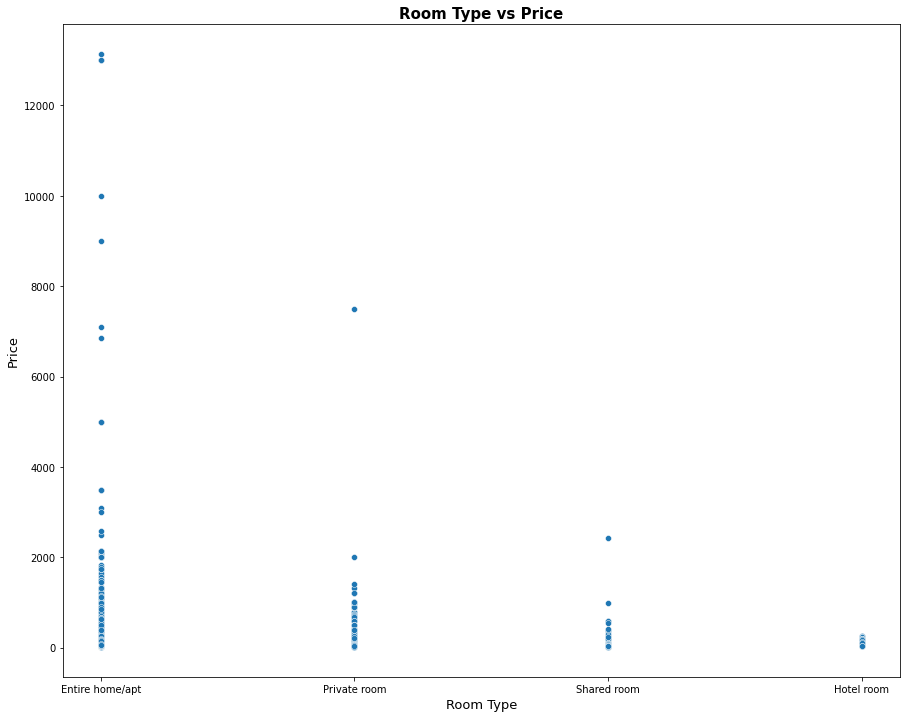

In [9]:
import seaborn as sns
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

Text(0.5, 1.0, 'Neighbourhood vs Price')

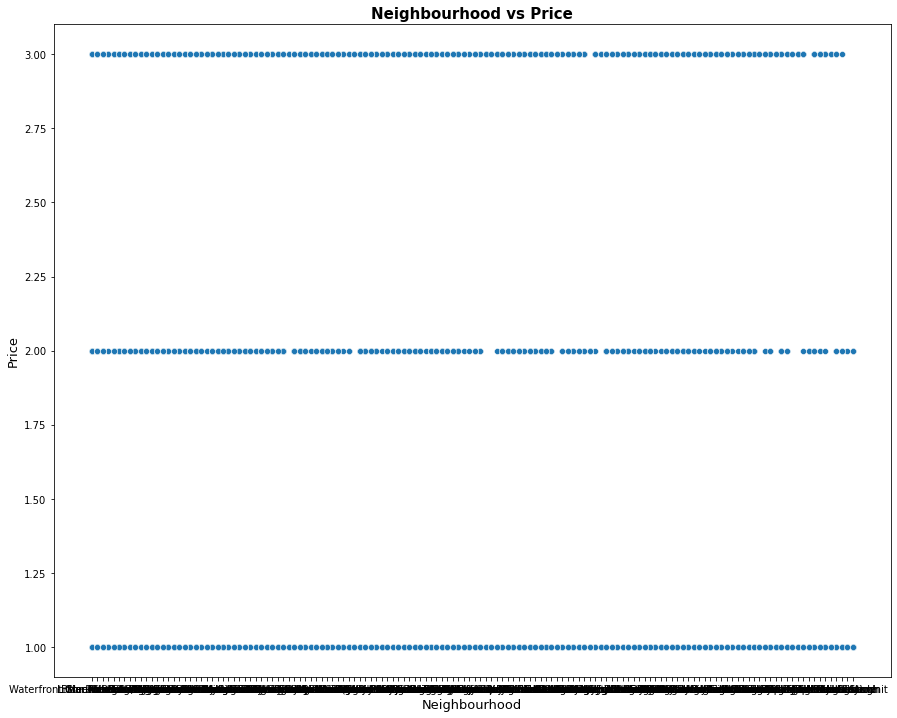

In [10]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='neighbourhood', y='categoryPrice', data=df)

plt.xlabel("Neighbourhood", size=13)
plt.ylabel("Price", size=13)
plt.title("Neighbourhood vs Price",size=15, weight='bold')

The Price category distribution over the neighbourhood can be found above. As the total number of neigbourhood comes to 143, the data points on the graph are showing up as a compressed continous line in fron of each category. There are several neighbourhoods that are not availble in the Medium price category. This has effected on the model accuracy by creating an imbalanced data set. 

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

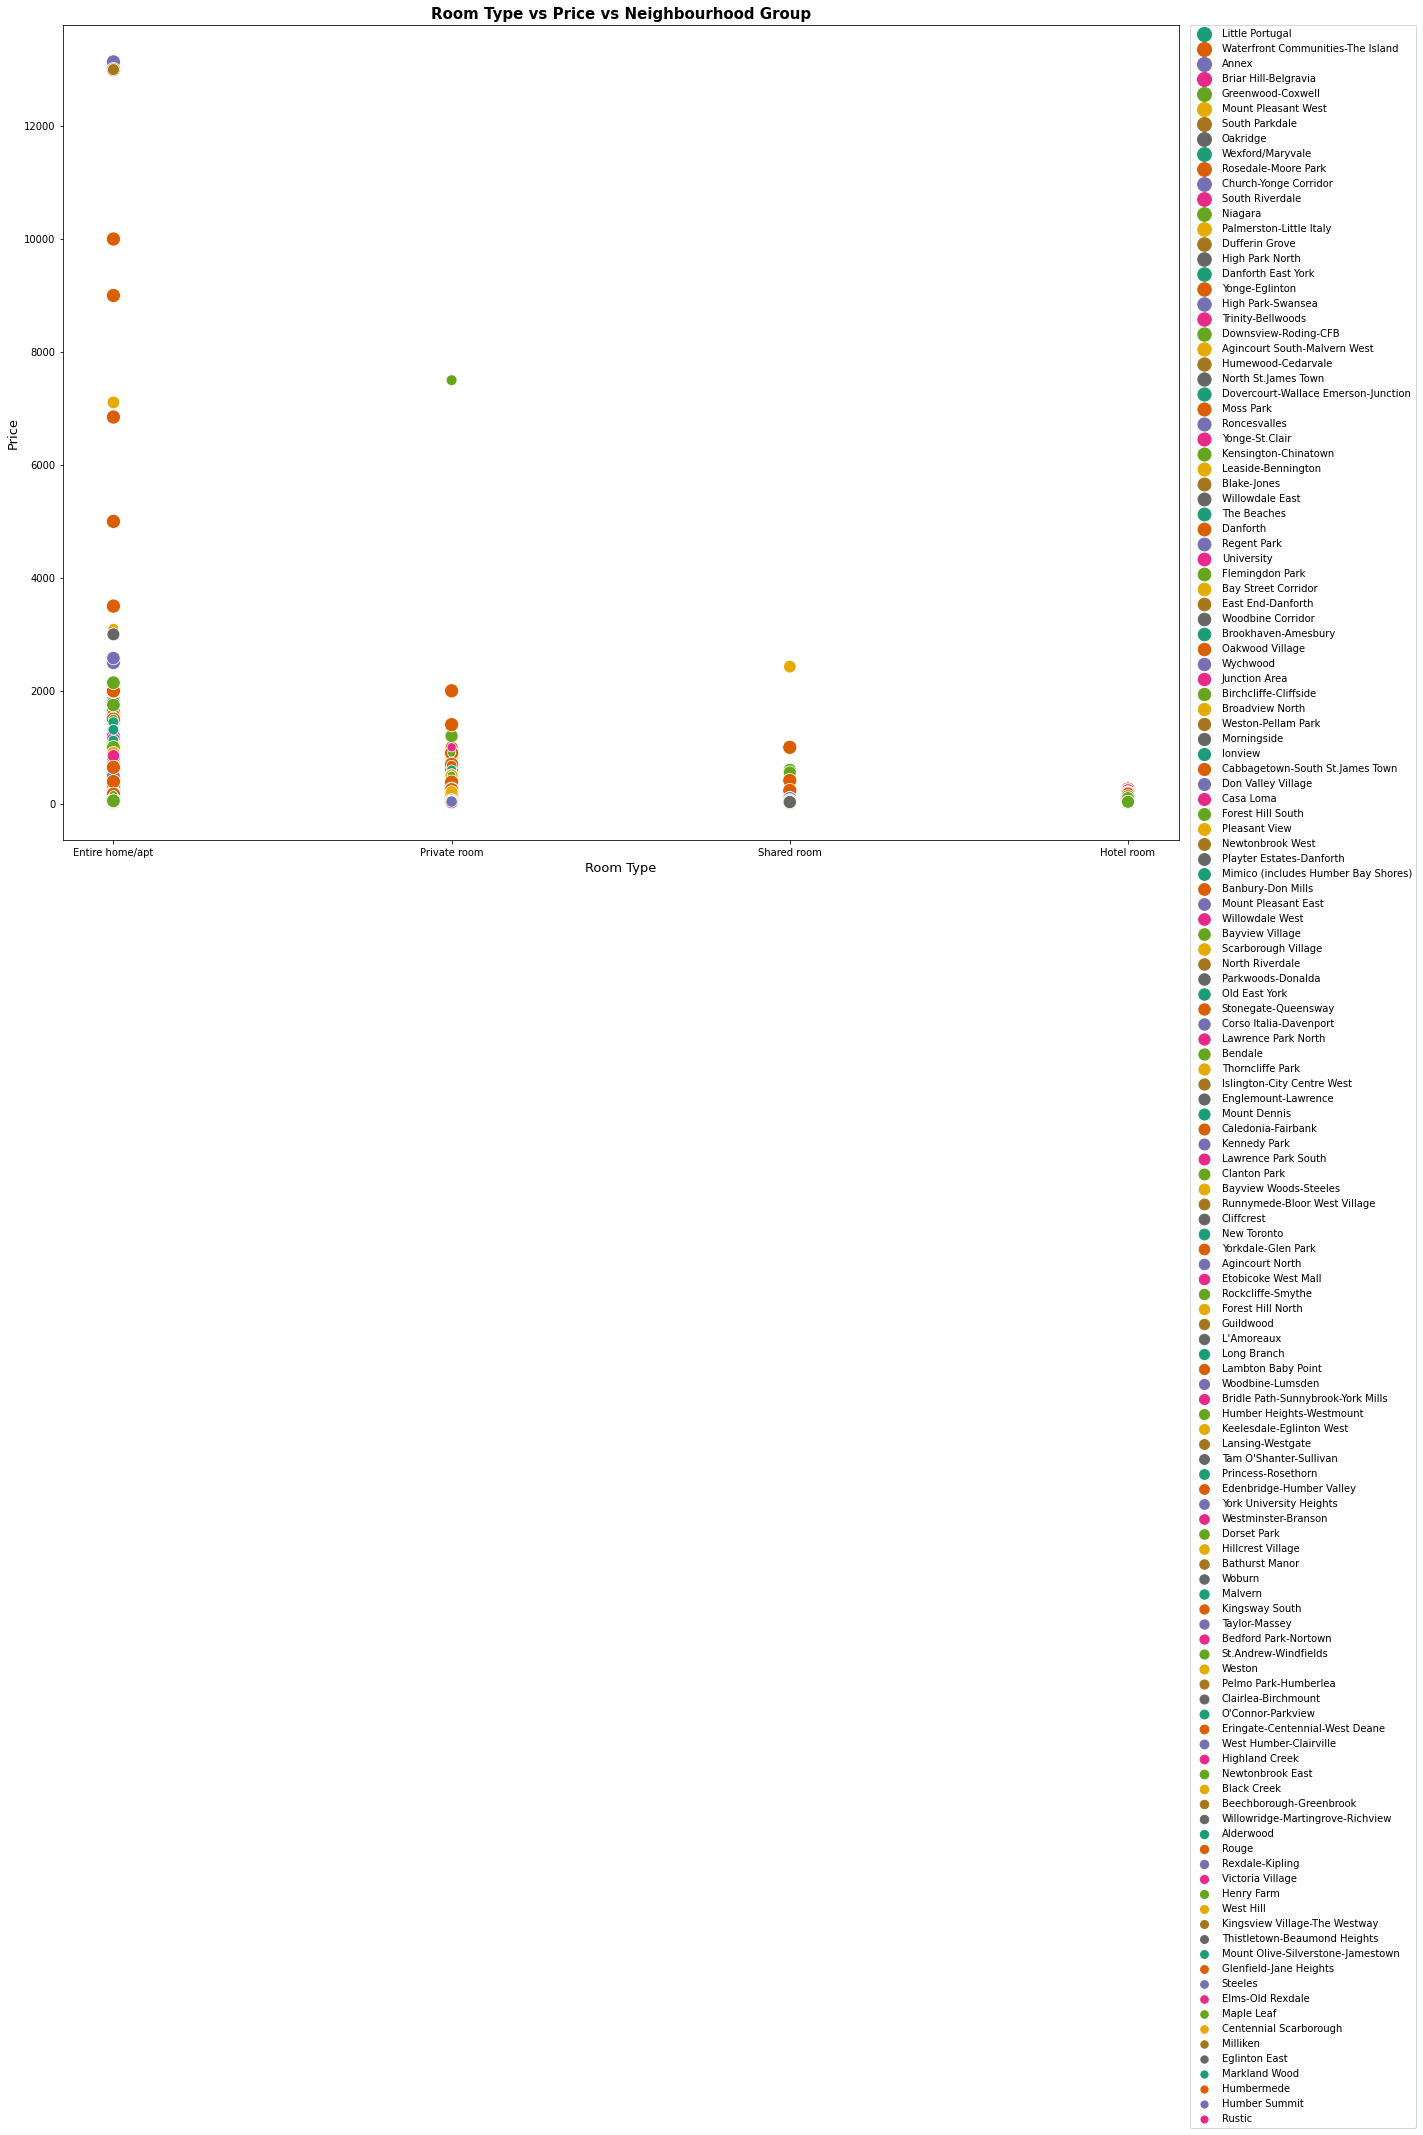

In [11]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood", size="neighbourhood",
            sizes=(50, 200), palette="Dark2", data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')